<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2020 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

**Temas**  

* Arquitectura Básica de Redes Neuronales. Redes *Feed-Forward*
* Entrenamiento de Redes Neuronales. 
* Redes Convolucionales. 

**Formalidades**  
* Equipos de trabajo de: 3 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Formato de entrega: envı́o de link Github y link de video Youtube o plataforma a convenir, todo esto vía Aula. 

<hr style="height:2px;border:none"/>

### **Propuesta**
* Se debe preparar una presentación de **15 a 20 minutos** donde se explique el cómo se va a realizar/resolver el taller, la metodología o propuesta de las componentes a experimentar y explorar. Más detalles en el Syllabus.
* Fecha de encuentro Zoom: 8 de Mayo en horario de clases.
* Fecha de entrega de vídeo: Opcional para quienes presentaron y obligatorio para quienes no, a lo más 2 días después del encuentro.
* Modalidad de Presentación (Zoom): En el primer bloque, se formarán 3 grupos para que alcancen a recibir feedback todos los equipos. En el segundo bloque, algunos equipos seleccionados presentarán a todo el curso. 

**Aún si la idea es aprender colaborativamente, valoraremos mucho la diversidad de ideas, por lo que las propuesta debiesen conservar su orientación inicial, excepto por el feedback que les entreguemos**

### **Defensa**
* Se debe preparar una presentación de **15 a 20 minutos** con los resultados obtenidos y conclusiones de la experiencia. 
* Se debe entregar el código, de preferencia en un (breve) Jupyter/IPython notebook, de modo que **permita reproducir los resultados** presentados. Si se entrega el código fuente se deben proveer instrucciones para su uso.
* Fecha de encuentro Zoom: 29 de Mayo, horario de clases.
* Fecha de entrega de vídeo: 27 de Mayo (2 días antes de encuentro).
* Fecha de entrega de Jypter (notebook): 27 de Mayo (commits hasta el 29 de Mayo en horario de clases). 
* Modalidad de Presentación (Zoom): En ambos bloques algunos equipos seleccionados presentarán ante todo el curso, discusión y debate se generará en base a los resultados.

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Pregunta Libre   
[2.](#segundo) Challenge Kaggle


#### <a id="primero"></a>
## 1. Pregunta Libre

Refute o evidencie experimentalmente una de las siguientes afirmaciones 

> **1. Rol de la Profundidad**: Si se toma una arquitectura base cualquiera, $A$, de red neuronal y se añade una capa, $A^{+1}$, siempre se mejorará la tarea objetivo en el conjunto de entrenamiento, validación y pruebas. Eso no depende de la forma de entrenar.

R: ¿Que pasa si agrego capas con una neurona?

> **2. Teorema de approx. universal**: Una arquitectura de red neuronal tiene la capacidad de aproximar cualquier función y esto es independiente del número de neuronas o capas.

R: El detalle, es que la red neuronal tiene la capacidad de aproximar solo funciones **continuas**

> **3. Rol de la Profundidad**: Si se toma una arquitectura base $A$ con $n$ neuronas y $L$ capas, y se redistribuyen las neuronas aumentando $L$, será posible aprender mejor y más rápido la tarea. 

R:

> **4. Convergencia**: Con la suficiente cantidad de iteraciones, una red neuronal siempre podrá converger algun mínimo local. El tiempo que tarda es independiente de la tasa de aprendizaje y el tamaño de batch.

> **5. Convergencia (2)**: La velocidad de aprendizaje es independiente de la función de activación que se utilice en las capas ocultas y del número de ejemplos de entrenamiento. 

> **6. Approx universal y tolerancia a ruido**: Una red neuronal tiene la capacidad de aprender en el conjunto entrenado, incluso si el *target* (objetivo de la tarea) es aleatorio. Si el porcentaje de etiquetas corruptas  (por ejemplo con un *shift* o *shuffle* sobre $y$) es pequeño, la red aprende la tarea correcta.

> **7. Arquitectura y parámetros de CNN**: Una red convolucional siempre tendrá menor cantidad de parámetros que una red *Feed Forward*, por ende, su desempeño en la tarea estará limitado.

> **8. Ventajas de una CNN**: En cualquier problema que se tenga estructura espacial (uni-dimensional como texto o bi-dimensional como imágenes), una red neuronal con arquitectura convolucional será la más **adecuada** para resolverlo.

> **9. Aplicaciones de una CNN**: No resulta ventajoso aplicar una red con arquitectura convolucional en problemas de regresión. 

> **10. Aplicaciones de una NN**: Las redes neuroanles no se aplican correctamente a problemas multi-label.

> **11. Limitaciones de una NN**: El desbalanceo de las clases no tiene ningún efecto en el entrenamiento de la red.

**Reglas mínimas**: Validar en al menos 1 dataset sintético y 2 reales.


## XOR Example

In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np


Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [2]:
def ANN_regresion_nN(X, y, input_dim, neurons=2, layers=1, activation='relu', epochs=10, batch_size=100, verbose=2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    scaler = MinMaxScaler((-1,1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = Sequential()
    neurons = int(np.round(neurons/layers)) if neurons > 1 else 1
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    y_pred = model.predict(X_test, batch_size = batch_size)
    y_pred = (y_pred > 0.5)
    
    y_hat = model.predict(x)
    print(model.evaluate(x, y, verbose=0)[1])    
    return y_pred, y_test

def ANN_regresion_nlayer(X, y, input_dim, layers, neurons=2 , activation='relu', epochs=10, batch_size=100, verbose=2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    scaler = MinMaxScaler((-1,1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = Sequential()
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    y_pred = model.predict(X_test, batch_size = batch_size)
    y_pred = (y_pred > 0.5)
    
    y_hat = model.predict(x)
    print(model.evaluate(x, y, verbose=0)[1])
    return y_pred, y_test

In [3]:
size_train = 100000

# Create pair of numbers (a, b)
a = np.random.randint(0,2,size_train)[:,np.newaxis]
b = np.random.randint(0,2,size_train)[:,np.newaxis]
# Label of xor, between a and b 
y = np.logical_xor(a, b).astype(int)
x = np.concatenate([a,b], axis=1)
print(f'matrix size of train set {x.shape}\n')

matrix size of train set (100000, 2)



In [4]:
y_pred_list_1layer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(x, y, x.shape[1], layers=1, neurons=i , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_1layer.append(score)
 

1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
80000/80000 [==============================] - 3s 42us/step - loss: 0.7224 - accuracy: 0.5007
Epoch 2/10
80000/80000 [==============================] - 3s 36us/step - loss: 0.6936 - accuracy: 0.5005
Epoch 3/10
80000/80000 [==============================] - 3s 35us/step - loss: 0.6606 - accuracy: 0.6047
Epoch 4/10
80000/80000 [==============================] - 3s 35us/step - loss: 0.5567 - accuracy: 0.7492
Epoch 5/10
80000/80000 [==============================] - 3s 37us/step - loss: 0.5076 - accuracy: 0.7492
Epoch 6/10
80000/80000 [==============================] - 3s 37us/step - loss: 0.4913 - accuracy: 0.7492
Epoch 7/10
80000/80000 [==============================] - 3s 36us/step - loss: 0.4851 - accuracy: 0.7492
Epoch 8/10
80000/80000 [==============================] - ETA: 0s - loss: 0.4825 - accuracy: 0.74 - 3s 37us/step - loss: 0.4823 - accuracy: 0.7492
Epoch 9/10
80000/8000

In [5]:
y_pred_list_nNeuron = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nN(x, y, x.shape[1], layers=i, neurons=14 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nNeuron.append(score)

1
Epoch 1/10
80000/80000 [==============================] - 3s 37us/step - loss: 0.4010 - accuracy: 0.9281
Epoch 2/10
80000/80000 [==============================] - 3s 38us/step - loss: 0.0772 - accuracy: 1.0000
Epoch 3/10
80000/80000 [==============================] - 3s 36us/step - loss: 0.0201 - accuracy: 1.0000
Epoch 4/10
80000/80000 [==============================] - 3s 35us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 5/10
80000/80000 [==============================] - 3s 35us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6/10
80000/80000 [==============================] - 3s 36us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 7/10
80000/80000 [==============================] - 3s 35us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 8/10
80000/80000 [==============================] - 3s 36us/step - loss: 6.3791e-04 - accuracy: 1.0000
Epoch 9/10
80000/80000 [==============================] - 3s 35us/step - loss: 3.8338e-04 - accuracy: 1.0000
Epoch 10/10
80000/80000 [====================

In [6]:
y_pred_list_nlayer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(x, y, x.shape[1], layers=i, neurons=14 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nlayer.append(score)

1
Epoch 1/10
80000/80000 [==============================] - 3s 44us/step - loss: 0.4099 - accuracy: 0.9527
Epoch 2/10
80000/80000 [==============================] - 3s 41us/step - loss: 0.1245 - accuracy: 1.0000
Epoch 3/10
80000/80000 [==============================] - 3s 42us/step - loss: 0.0574 - accuracy: 1.0000
Epoch 4/10
80000/80000 [==============================] - 3s 40us/step - loss: 0.0332 - accuracy: 1.0000
Epoch 5/10
80000/80000 [==============================] - 3s 40us/step - loss: 0.0210 - accuracy: 1.0000
Epoch 6/10
80000/80000 [==============================] - 3s 41us/step - loss: 0.0138 - accuracy: 1.0000
Epoch 7/10
80000/80000 [==============================] - 3s 42us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 8/10
80000/80000 [==============================] - 3s 43us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 9/10
80000/80000 [==============================] - 3s 41us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 10/10
80000/80000 [============================

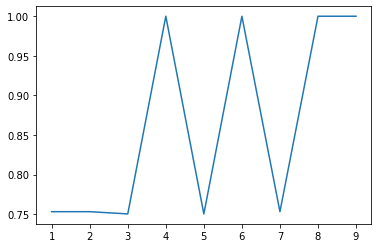

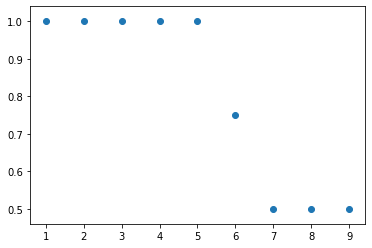

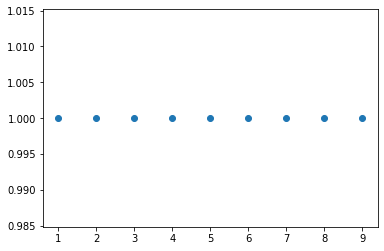

In [7]:
# Plot functions y_pred_list_1layer
plt.plot(range(1,10), y_pred_list_1layer, label=r"$y=1-x$")
plt.show()
# Plot functions y_pred_list_nNeuron
plt.scatter(range(1,10), y_pred_list_nNeuron)
plt.show()
# Plot functions
plt.scatter(range(1,10), y_pred_list_nlayer)
plt.show()

In [8]:
def ANN_regresion(X, y, input_dim,neurons=2, layers=1, activation='relu', epochs=25, batch_size=128,verbose=0):
    model = Sequential()
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer=SGD(lr=0.1), loss='mse')
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    return model

##  Continous Function Example

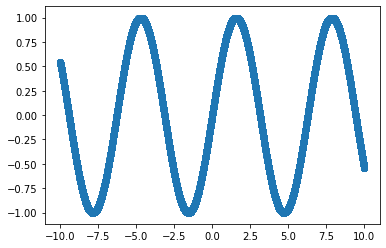

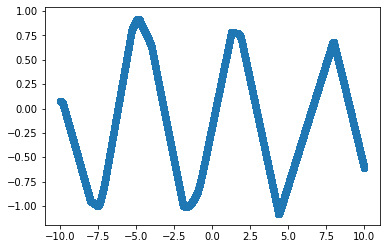

Mean Squared Error: 0.04313436214304017


In [9]:
# Continuous function
f_c = lambda x: np.sin(x)
f_c = np.vectorize(f_c)

x_c = np.random.uniform(low=-10, high=10, size=(100000,))[:,np.newaxis]
y_c = f_c(x_c)

# transform to [0~1] scale
scale_x = MinMaxScaler()
x_c = scale_x.fit_transform(x_c)
scale_y = MinMaxScaler()
y_c = scale_y.fit_transform(y_c)

neurons = 100
layers = 2
act_function = 'relu'

model = ANN_regresion(x_c, y_c, 1,
                      neurons=neurons,
                      layers=layers,
                      activation=act_function,
                      epochs=25,
                      batch_size=128,
                      verbose=0)
#  Predict Train Data
y_c_hat = model.predict(x_c)

# Transform to real scale
x_c = scale_x.inverse_transform(x_c)
y_c = scale_y.inverse_transform(y_c)
y_c_hat = scale_y.inverse_transform(y_c_hat)

# Plot functions
plt.scatter(x_c, y_c)
plt.show()
plt.scatter(x_c, y_c_hat)
plt.show()

print(f'Mean Squared Error: {mean_squared_error(y_c, y_c_hat)}')

## Discontinuous Function Example

(200000, 1)


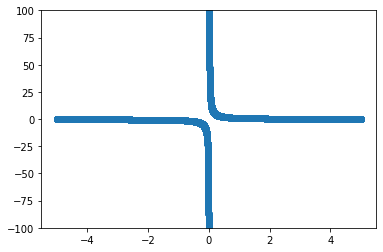

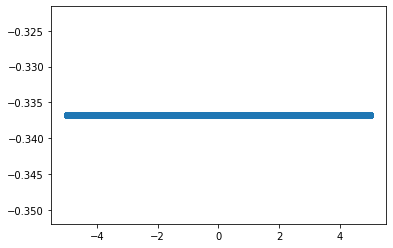

Mean Squared Error3556.9679090600216


In [10]:
# Discontinuous function
# f_d = lambda x: x**2 if x <0 else 40 + 10*x
f_d = lambda x: 1 /(x)
f_d = np.vectorize(f_d)
x_d_1 = np.random.uniform(low=-5, high=-1e-17, size=(100000,))[:,np.newaxis]
x_d_2 = np.random.uniform(low=1e-17, high=5, size=(100000,))[:,np.newaxis]
x_d = np.concatenate((x_d_1, x_d_2), axis = 0)
print(x_d.shape)
y_d = f_d(x_d)

# transform to [0~1] scale
scale_x = MinMaxScaler()
x_d = scale_x.fit_transform(x_d)
scale_y = MinMaxScaler()
y_d = scale_y.fit_transform(y_d)

neurons = 10
layers = 100
act_function='relu'

model = ANN_regresion(x_d, y_d, 1,
                      neurons=neurons,
                      layers=layers,
                      activation=act_function,
                      epochs=25,
                      batch_size=128,
                      verbose=0)
# Predict Train Data
y_d_hat = model.predict(x_d)

# Transform to real scale
x_d = scale_x.inverse_transform(x_d)
y_d = scale_y.inverse_transform(y_d)
y_d_hat = scale_y.inverse_transform(y_d_hat)

# Plot functions
plt.scatter(x_d, y_d)
plt.ylim(-100,100)
plt.show()
plt.scatter(x_d, y_d_hat)
plt.show()
print(f'Mean Squared Error{mean_squared_error(y_d, y_d_hat)}')

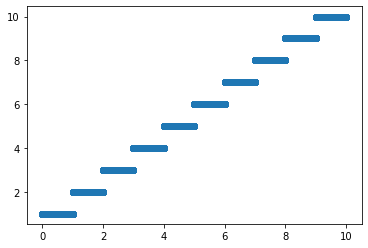

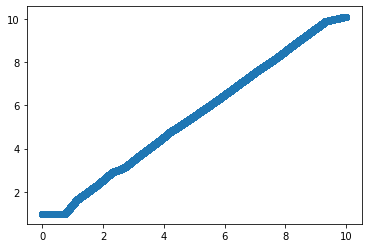

In [11]:
import math

math.ceil(0.1)
f_ceil = lambda x: math.ceil(x)
f_ceil = np.vectorize(f_ceil)
x = np.random.uniform(low=0, high=10, size=(100000,))[:,np.newaxis]
y = f_ceil(x)

scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

neurons = 10
layers = 10
act_function='relu'

model = ANN_regresion(x, y, 1,
                      neurons=neurons,
                      layers=layers,
                      activation=act_function,
                      epochs=25,
                      batch_size=128,
                      verbose=0)
# Predict Train Data
y_hat = model.predict(x)

# Transform to real scale
x = scale_x.inverse_transform(x)
y = scale_y.inverse_transform(y)
y_hat = scale_y.inverse_transform(y_hat)


plt.scatter(x,y)
plt.show()
plt.scatter(x,y_hat)
plt.show()

## Primer Dataset

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.backend import clear_session

In [13]:
import pandas as pd

df = pd.read_csv('high_diamond_ranked_10min.csv')
df = df.drop(['gameId','blueWardsDestroyed','blueFirstBlood','blueDragons','blueHeralds','blueTotalExperience','blueCSPerMin','redWardsPlaced','redWardsDestroyed','redFirstBlood','redDragons','redHeralds','redTotalExperience','redCSPerMin'],axis= 1)

In [14]:
df1 = df.loc[:, df.columns != 'blueWins']
df2 = df['blueWins']

df1.head()

,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,...,redAssists,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redGoldPerMin
0,28,9,6,11,0,0,17210,6.6,195,36,...,8,0,0,16567,6.8,197,55,-643,8,1656.7
1,12,5,5,5,0,0,14712,6.6,174,43,...,2,2,1,17620,6.8,240,52,2908,1173,1762.0
2,15,7,11,4,1,0,16113,6.4,186,46,...,14,0,0,17285,6.8,203,28,1172,1033,1728.5
3,43,4,5,5,1,0,15157,7.0,201,55,...,10,0,0,16478,7.0,235,47,1321,7,1647.8
4,75,6,6,6,0,0,16400,7.0,210,57,...,7,1,0,17404,7.0,225,67,1004,-230,1740.4


In [15]:
df1 = preprocessing.scale(df1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [17]:
model = Sequential()
model.add(Dense(22,input_shape=(25,), activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [18]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])
history_dict=history.history

Epoch 00029: early stopping


In [19]:
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

1976/1976 [==============================] - 0s 114us/step
Test loss:  0.5405108354352264
Test accuracy:  0.7231781482696533


## Primer dataset variando el numero de capas 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)
#model = Sequential()
#model.add(Dense(22,input_shape=(25,), activation = 'relu'))
capas = [4,8,12]
resultados = []
for j in range(0,len(capas)):
    model = Sequential()
    model.add(Dense(22,input_shape=(25,), activation = 'relu'))
    for i in range(0,capas[j]):
        model.add(Dense(14,activation = 'relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
    history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])
    loss, acc = model.evaluate(X_test, y_test)
    resultados.append((loss,acc))
    clear_session()
    

Epoch 00025: early stopping
1976/1976 [==============================] - 0s 109us/step
Epoch 00021: early stopping
1976/1976 [==============================] - 0s 59us/step
Epoch 00020: early stopping
1976/1976 [==============================] - 0s 69us/step


In [21]:
tabla = pd.DataFrame(resultados, index =['4 capas', '8 capas', '12 capas'], columns = ['loss', 'acc'])
tabla

,loss,acc
4 capas,0.582303,0.703441
8 capas,0.583482,0.709008
12 capas,0.580275,0.709008


In [22]:
seg_resultados = [l[1] for l in resultados]


[]

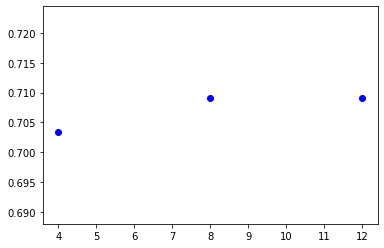

In [23]:
capas = [4,8,12]
plt.scatter(capas,seg_resultados,c = 'b')
plt.plot()

## Primer dataset variando el numero de Neuronas

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)
#model = Sequential()
#model.add(Dense(22,input_shape=(25,), activation = 'relu'))
neuronas = [13,18,40]
resultados_neuronas = []
for j in range(0,len(neuronas)):
    model = Sequential()
    model.add(Dense(22,input_shape=(25,), activation = 'relu'))
    model.add(Dense(neuronas[j],activation = 'relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
    history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])
    loss, acc = model.evaluate(X_test, y_test)
    resultados_neuronas.append((loss,acc))
    clear_session()

Epoch 00020: early stopping
1976/1976 [==============================] - 0s 57us/step
Epoch 00018: early stopping
1976/1976 [==============================] - 0s 50us/step
Epoch 00017: early stopping
1976/1976 [==============================] - 0s 50us/step


In [25]:
tabla2 = pd.DataFrame(resultados_neuronas, index =['13 neuronas', '18 neuronas', '40 neuronas'], columns = ['loss', 'acc'])
tabla2

,loss,acc
13 neuronas,0.536277,0.721660
18 neuronas,0.531959,0.727227
40 neuronas,0.532938,0.717611


[]

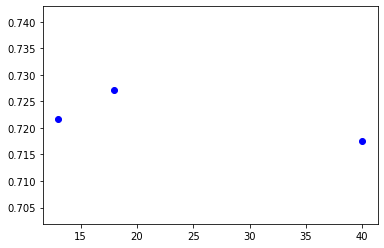

In [26]:
neuronas = [13,18,40]
seg_resultados = [l[1] for l in resultados_neuronas]
plt.scatter(neuronas,seg_resultados,c = 'b')
plt.plot()

## Primer dataset distribuyendo neuronas a traves de las capas

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)
#model = Sequential()
#model.add(Dense(22,input_shape=(25,), activation = 'relu'))
capas = [1,2,3,4,5,6,7,8,9,10]
resultados_nc = []
neuronas = 14
for j in range(0,len(capas)):
    model = Sequential()
    neuro = neuronas//capas[j]
    model.add(Dense(neuro,input_shape=(25,), activation = 'relu'))
    for i in range(0,capas[j]):
        model.add(Dense(neuro,activation = 'relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
    history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])
    loss, acc = model.evaluate(X_test, y_test)
    resultados_nc.append((loss,acc))
    clear_session()

Epoch 00020: early stopping
1976/1976 [==============================] - 0s 52us/step
Epoch 00036: early stopping
1976/1976 [==============================] - 0s 50us/step
Epoch 00070: early stopping
1976/1976 [==============================] - 0s 54us/step
Epoch 00016: early stopping
1976/1976 [==============================] - 0s 58us/step
Epoch 00016: early stopping
1976/1976 [==============================] - 0s 59us/step
Epoch 00075: early stopping
1976/1976 [==============================] - 0s 60us/step
Epoch 00089: early stopping
1976/1976 [==============================] - 0s 61us/step
Epoch 00016: early stopping
1976/1976 [==============================] - 0s 55us/step
Epoch 00017: early stopping
1976/1976 [==============================] - 0s 66us/step
Epoch 00016: early stopping
1976/1976 [==============================] - 0s 71us/step


In [28]:
resultados_nc = [l[1] for l in resultados_nc]

[]

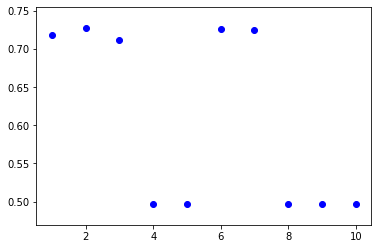

In [29]:
plt.scatter(capas,resultados_nc,c = 'b')
plt.plot()

## Dataset real 2

In [30]:
data = pd.read_csv('ks.csv',
                 parse_dates=['deadline', 'launched'])

data.drop('ID', axis = 1, inplace = True)
data.drop('goal', axis = 1, inplace = True)
data.drop('pledged', axis = 1, inplace = True)
data.drop('usd pledged', axis = 1, inplace = True)

data['deadline']=pd.to_datetime(data['deadline'], format="%Y/%m/%d").dt.date
data['launched']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.date

data['days'] = (data['deadline'] - data['launched']).dt.days
data['launch_year']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.year

data["launch_year"]=data['launch_year'].apply(str)

data.corr()

,backers,usd_pledged_real,usd_goal_real,days
backers,1.000000,0.752539,0.004517,-0.000792
usd_pledged_real,0.752539,1.000000,0.005596,0.000946
usd_goal_real,0.004517,0.005596,1.000000,0.004184
days,-0.000792,0.000946,0.004184,1.000000


In [31]:
data_for_model = pd.read_csv('ks.csv')

#Datetime Processing
data_for_model['deadline']=pd.to_datetime(data_for_model['deadline'], format="%Y/%m/%d")
data_for_model['launched']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d")

data_for_model['days'] = (data_for_model['deadline'] - data_for_model['launched']).dt.days
data_for_model['launch_year']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d").dt.year
data_for_model.drop(['ID',"name","category","launched","currency","deadline","usd pledged","goal","pledged"], axis = 1, inplace = True)

data_for_model["launch_year"]=data_for_model['launch_year'].apply(str) #it has to be string.

data_for_model.corr()

,backers,usd_pledged_real,usd_goal_real,days
backers,1.000000,0.752539,0.004517,-0.000792
usd_pledged_real,0.752539,1.000000,0.005596,0.000946
usd_goal_real,0.004517,0.005596,1.000000,0.004184
days,-0.000792,0.000946,0.004184,1.000000


In [32]:
print("Unbalanced Data shape", len(data))
datafail = data_for_model[data_for_model.state == "failed"]
datasuccess = data_for_model[data_for_model.state == "successful"]
data_for_model = pd.concat([datafail.sample(len(datasuccess), random_state=5), datasuccess])
print("Balanced data shape:", len(data))
data_for_model.state.value_counts()

Unbalanced Data shape 378661
Balanced data shape: 378661


successful    133956
failed        133956
Name: state, dtype: int64

In [33]:
def state_process(cell_value):
    if cell_value == 'successful':
        return 1
    else:
        return 0    
data_for_model.state = data_for_model.state.apply(state_process)
data_for_model.head()

,main_category,state,backers,country,usd_pledged_real,usd_goal_real,days,launch_year
284067,Publishing,0,13,SE,312.18,860.15,39,2017
281299,Film & Video,0,1,US,10.00,100000.00,29,2015
6785,Music,0,2,US,550.00,4000.00,29,2012
220548,Design,0,1,US,200.00,2750.00,29,2013
301405,Games,0,5,MX,47.69,4841.44,44,2016


In [34]:
print('Original Features:\n', list(data.columns), '\n')
data_for_model= pd.get_dummies(data_for_model)
print('Features after One-Hot Encoding:\n', list(data_for_model.columns))
data_for_model.shape

Original Features:
 ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'days', 'launch_year'] 

Features after One-Hot Encoding:
 ['state', 'backers', 'usd_pledged_real', 'usd_goal_real', 'days', 'main_category_Art', 'main_category_Comics', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Journalism', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'country_AT', 'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP', 'country_LU', 'country_MX', 'country_N,0"', 'country_NL', 'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US', 'launch_year

(267912, 52)

In [35]:
def ANN_regresion_nN(X, y, input_dim, neurons=2, layers=1, activation='relu', epochs=10, batch_size=100, verbose=2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    scaler = MinMaxScaler((-1,1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = Sequential()
    neurons = int(np.round(neurons/layers)) if neurons > 1 else 1
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    y_pred = model.predict(X_test, batch_size = batch_size)
    y_pred = (y_pred > 0.5)
    
    return y_pred, y_test

def ANN_regresion_nlayer(X, y, input_dim, layers, neurons=2 , activation='relu', epochs=10, batch_size=100, verbose=2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    scaler = MinMaxScaler((-1,1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = Sequential()
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    y_pred = model.predict(X_test, batch_size = batch_size)
    y_pred = (y_pred > 0.5)
    
    return y_pred, y_test

In [36]:
from sklearn import metrics

X = data_for_model.iloc[:,data_for_model.columns != 'state']
y = data_for_model.state

In [37]:
y_pred_list_1layer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=1, neurons=i , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_1layer.append(score)

1
Epoch 1/10
214329/214329 [==============================] - 8s 37us/step - loss: 0.2586 - accuracy: 0.9624
Epoch 2/10
214329/214329 [==============================] - 8s 36us/step - loss: 0.1020 - accuracy: 0.9868
Epoch 3/10
214329/214329 [==============================] - 8s 36us/step - loss: 0.0452 - accuracy: 0.9956
Epoch 4/10
214329/214329 [==============================] - 8s 36us/step - loss: 0.0458 - accuracy: 0.9940
Epoch 5/10
214329/214329 [==============================] - 8s 36us/step - loss: 0.0419 - accuracy: 0.9929
Epoch 6/10
214329/214329 [==============================] - 8s 36us/step - loss: 0.0326 - accuracy: 0.9943
Epoch 7/10
214329/214329 [==============================] - 8s 36us/step - loss: 0.0168 - accuracy: 0.9975
Epoch 8/10
214329/214329 [==============================] - 8s 36us/step - loss: 0.0196 - accuracy: 0.9972
Epoch 9/10
214329/214329 [==============================] - 8s 36us/step - loss: 0.0239 - accuracy: 0.9963
Epoch 10/10
214329/214329 [========

In [38]:
y_pred_list_nNeuron = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nN(X, y, X.shape[1], layers=i, neurons=10 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nNeuron.append(score)

1
Epoch 1/10
214329/214329 [==============================] - 9s 40us/step - loss: 30.5858 - accuracy: 0.9797
Epoch 2/10
214329/214329 [==============================] - 8s 38us/step - loss: 0.0594 - accuracy: 0.9982
Epoch 3/10
214329/214329 [==============================] - 8s 38us/step - loss: 0.0400 - accuracy: 0.9986
Epoch 4/10
214329/214329 [==============================] - 8s 38us/step - loss: 0.0833 - accuracy: 0.9987
Epoch 5/10
214329/214329 [==============================] - 8s 38us/step - loss: 0.0531 - accuracy: 0.9992
Epoch 6/10
214329/214329 [==============================] - 8s 38us/step - loss: 0.0429 - accuracy: 0.9995
Epoch 7/10
214329/214329 [==============================] - 8s 38us/step - loss: 0.0619 - accuracy: 0.9994
Epoch 8/10
214329/214329 [==============================] - 8s 39us/step - loss: 0.0649 - accuracy: 0.9993
Epoch 9/10
214329/214329 [==============================] - 8s 38us/step - loss: 0.1263 - accuracy: 0.9993
Epoch 10/10
214329/214329 [=======

In [39]:
y_pred_list_nlayer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=i, neurons=10 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nlayer.append(score)

1
Epoch 1/10
214329/214329 [==============================] - 10s 46us/step - loss: 13.5362 - accuracy: 0.9877 1s - loss: 15
Epoch 2/10
214329/214329 [==============================] - 10s 46us/step - loss: 0.1092 - accuracy: 0.9981
Epoch 3/10
214329/214329 [==============================] - 10s 48us/step - loss: 0.0497 - accuracy: 0.9989
Epoch 4/10
214329/214329 [==============================] - 10s 48us/step - loss: 0.1823 - accuracy: 0.9980
Epoch 5/10
214329/214329 [==============================] - 11s 54us/step - loss: 0.0577 - accuracy: 0.9992
Epoch 6/10
214329/214329 [==============================] - 9s 43us/step - loss: 0.1768 - accuracy: 0.9989
Epoch 7/10
214329/214329 [==============================] - 9s 43us/step - loss: 0.0940 - accuracy: 0.9992
Epoch 8/10
214329/214329 [==============================] - 9s 44us/step - loss: 0.0707 - accuracy: 0.9994
Epoch 9/10
214329/214329 [==============================] - 9s 43us/step - loss: 0.1568 - accuracy: 0.9990
Epoch 10/10
214

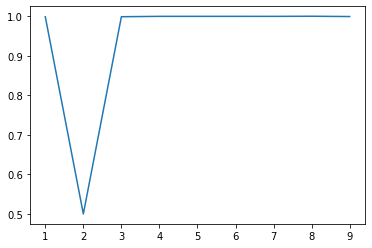

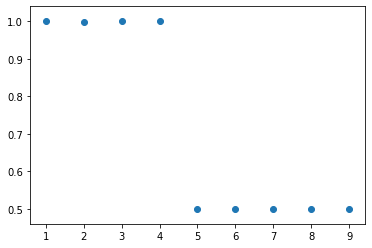

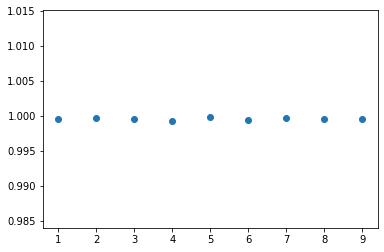

In [40]:

# Plot functions y_pred_list_1layer
plt.plot(range(1,10), y_pred_list_1layer, label=r"$y=1-x$")
plt.show()
# Plot functions y_pred_list_nNeuron
plt.scatter(range(1,10), y_pred_list_nNeuron)
plt.show()
# Plot functions
plt.scatter(range(1,10), y_pred_list_nlayer)
plt.show()
# print(f'Mean Squared Error{mean_squared_error(y_d, y_d_hat)}')

In [41]:
data = pd.read_csv('ks.csv',
                 parse_dates=['deadline', 'launched'])

data.drop('ID', axis = 1, inplace = True)
data.drop('goal', axis = 1, inplace = True)
data.drop('pledged', axis = 1, inplace = True)
data.drop('usd pledged', axis = 1, inplace = True)

data['deadline']=pd.to_datetime(data['deadline'], format="%Y/%m/%d").dt.date
data['launched']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.date

data['days'] = (data['deadline'] - data['launched']).dt.days
data['launch_year']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.year

data["launch_year"]=data['launch_year'].apply(str)

data_for_model = pd.read_csv('ks.csv')

#Datetime Processing
data_for_model['deadline']=pd.to_datetime(data_for_model['deadline'], format="%Y/%m/%d")
data_for_model['launched']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d")

data_for_model['days'] = (data_for_model['deadline'] - data_for_model['launched']).dt.days
data_for_model['launch_year']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d").dt.year
data_for_model.drop(['ID',"name","category","launched","currency","deadline","usd pledged","pledged", "country", "main_category"], axis = 1, inplace = True)

data_for_model["launch_year"]=data_for_model['launch_year'].apply(str) #it has to be string.

In [42]:
# print("Unbalanced Data shape", len(data))
# datafail = data_for_model[data_for_model.state == "failed"]
# datasuccess = data_for_model[data_for_model.state == "successful"]
# data_for_model = pd.concat([datafail.sample(len(datasuccess), random_state=5), datasuccess])
# print("Balanced data shape:", len(data))
# data_for_model.state.value_counts()

def state_process(cell_value):
    if cell_value == 'successful':
        return 1
    else:
        return 0    
data_for_model.state = data_for_model.state.apply(state_process)

data_for_model.head()

,goal,state,backers,usd_pledged_real,usd_goal_real,days,launch_year
0,1000.0,0,0,0.0,1533.95,58,2015
1,30000.0,0,15,2421.0,30000.00,59,2017
2,45000.0,0,3,220.0,45000.00,44,2013
3,5000.0,0,1,1.0,5000.00,29,2012
4,19500.0,0,14,1283.0,19500.00,55,2015


In [43]:
from sklearn import metrics

X = data_for_model.iloc[:,data_for_model.columns != 'state']
y = data_for_model.state

In [44]:
y_pred_list_1layer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=1, neurons=i , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_1layer.append(score)

1
Epoch 1/10
302928/302928 [==============================] - 15s 49us/step - loss: 0.7762 - accuracy: 0.6459
Epoch 2/10
302928/302928 [==============================] - 15s 48us/step - loss: 0.7239 - accuracy: 0.6461
Epoch 3/10
302928/302928 [==============================] - 15s 48us/step - loss: 0.6782 - accuracy: 0.6461
Epoch 4/10
302928/302928 [==============================] - 15s 48us/step - loss: 0.6601 - accuracy: 0.6461
Epoch 5/10
302928/302928 [==============================] - 15s 48us/step - loss: 0.6529 - accuracy: 0.6461
Epoch 6/10
302928/302928 [==============================] - 15s 48us/step - loss: 0.6506 - accuracy: 0.6461
Epoch 7/10
302928/302928 [==============================] - 15s 48us/step - loss: 0.6498 - accuracy: 0.6461
Epoch 8/10
302928/302928 [==============================] - 15s 48us/step - loss: 0.6498 - accuracy: 0.6461
Epoch 9/10
302928/302928 [==============================] - 15s 48us/step - loss: 0.6498 - accuracy: 0.6461
Epoch 10/10
302928/302928 

In [45]:
y_pred_list_nNeuron = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nN(X, y, X.shape[1], layers=i, neurons=14 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nNeuron.append(score)

1
Epoch 1/10
302928/302928 [==============================] - 16s 53us/step - loss: 2083.2179 - accuracy: 0.8568
Epoch 2/10
302928/302928 [==============================] - 16s 53us/step - loss: 3.5445 - accuracy: 0.9729
Epoch 3/10
302928/302928 [==============================] - 16s 53us/step - loss: 2.7462 - accuracy: 0.9769
Epoch 4/10
302928/302928 [==============================] - 16s 52us/step - loss: 2.8792 - accuracy: 0.9777
Epoch 5/10
302928/302928 [==============================] - 16s 53us/step - loss: 3.3629 - accuracy: 0.9781
Epoch 6/10
302928/302928 [==============================] - 16s 52us/step - loss: 3.2796 - accuracy: 0.9788
Epoch 7/10
302928/302928 [==============================] - 16s 52us/step - loss: 2.2731 - accuracy: 0.9794
Epoch 8/10
302928/302928 [==============================] - 16s 52us/step - loss: 2.6684 - accuracy: 0.9802
Epoch 9/10
302928/302928 [==============================] - 16s 52us/step - loss: 1.9117 - accuracy: 0.9808
Epoch 10/10
302928/3029

In [46]:
y_pred_list_nlayer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=i, neurons=14 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nlayer.append(score)

1
Epoch 1/10
302928/302928 [==============================] - 18s 59us/step - loss: 27.9267 - accuracy: 0.9503
Epoch 2/10
302928/302928 [==============================] - 17s 57us/step - loss: 3.9456 - accuracy: 0.9748
Epoch 3/10
302928/302928 [==============================] - 17s 57us/step - loss: 3.1889 - accuracy: 0.9789
Epoch 4/10
302928/302928 [==============================] - 17s 57us/step - loss: 2.9806 - accuracy: 0.9792
Epoch 5/10
302928/302928 [==============================] - 17s 57us/step - loss: 2.8445 - accuracy: 0.9804
Epoch 6/10
302928/302928 [==============================] - 17s 57us/step - loss: 3.4686 - accuracy: 0.9802
Epoch 7/10
302928/302928 [==============================] - 17s 57us/step - loss: 2.4249 - accuracy: 0.9811
Epoch 8/10
302928/302928 [==============================] - 17s 58us/step - loss: 3.0717 - accuracy: 0.9809
Epoch 9/10
302928/302928 [==============================] - 17s 57us/step - loss: 3.0375 - accuracy: 0.9807
Epoch 10/10
302928/302928

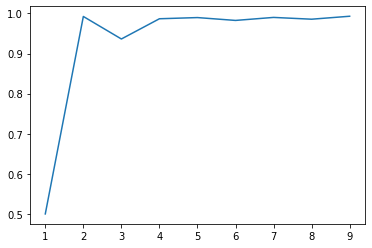

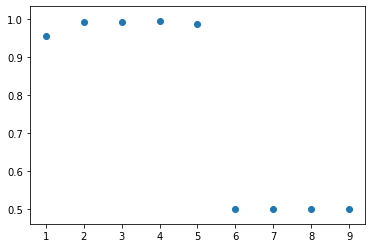

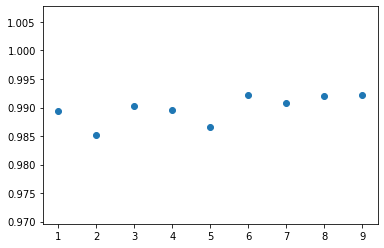

In [47]:
# Plot functions y_pred_list_1layer
plt.plot(range(1,10), y_pred_list_1layer, label=r"$y=1-x$")
plt.show()
# Plot functions y_pred_list_nNeuron
plt.scatter(range(1,10), y_pred_list_nNeuron)
plt.show()
# Plot functions
plt.scatter(range(1,10), y_pred_list_nlayer)
plt.show()
# print(f'Mean Squared Error{mean_squared_error(y_d, y_d_hat)}')

#### <a id="segundo"></a>
## 2. Challenge Kaggle

Pendiente

In [48]:
import numpy as np 
import pandas as pd
from PIL import Image
from os import listdir
from os.path import isfile, join
from keras.optimizers import Adam, SGD, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

dir = 'train_images'
extension='jpg'

paths = []
for f in listdir(dir):
    if isfile(join(dir,f)):
        path = join(dir,f)
        number = f.split('_')[1]
        number = int(number.split('.')[0])
        paths.append((number, path)) 
paths.sort(key= lambda file: file[0])

imgs = []
for _, path in paths:
    image = Image.open(path).convert("RGB")
    image=np.asarray(image)
    imgs.append(image)

X = np.array(imgs)/255.0
y = pd.read_csv('train_labels.csv')['Expected']


classes = np.unique(y)
n_classes = len(np.unique(y))
count = 0
labels ={}
for l in classes:
    labels[l] = count
    count+=1
y = np.array(y.replace(labels).tolist())
y = to_categorical(y,n_classes)

#Split train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
X_train = X
y_train = y

print(f'Cantidad de clases a predecir: {n_classes}')
print(f'Clases: {classes}')

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'train_images'

In [ ]:
N, width, height, depth = X_train.shape
N, width, height, depth

### VGG 19

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten

def create_cnn(classes, width, height, depth):
      
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(width, height, depth), activation='relu'))
    model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten()) 
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=1000, activation='relu'))
    #model.add(Dropout(0.5))

    if classes == 2:
        model.add(Dense(1))
        model.add(Activation('sigmoid'))
    else:
        model.add(Dense(classes, activation='softmax'))
    return model

CNN = create_cnn(n_classes, width, height, 3)
CNN.summary()

In [ ]:
optimizer = Adam()
CNN.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
CNN.fit(X_train,y_train, epochs=25, batch_size=32, verbose=1)

In [ ]:
CNN.evaluate(X_test, y_test)

In [ ]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True
                ):
    
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x
        
def resnet(input_shape, depth, num_classes):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
depth =  depth * 9 + 2
resnetModel = resnet((128, 128, 3), depth, n_classes)
resnetModel.summary()

In [ ]:
optimizer = Adam()
resnetModel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
resnetModel.fit(X_train,y_train, epochs=25, batch_size=32, verbose=1)

In [ ]:
from keras.models import load_model
# resnetModel.save('1rst_resnet_80perc_traindata.h5')  # creates a HDF5 file 'my_model.h5'
resnetModel.save('2d_resnet_100perc_traindata.h5')
del resnetModel
# returns a compiled model
# identical to the previous one
# model = load_model('1rst_resnet_80perc_traindata.h5')

In [ ]:
resnetModel.evaluate(X_test, y_test)

In [ ]:
dir_test = 'test_images'
extension='jpg'

paths_test = []
# print(listdir(dir_test))
for f in listdir(dir_test):
    if isfile(join(dir_test,f)):
        path = join(dir_test,f)
        number = f.split('_')[1]
        number = int(number.split('.')[0])
        paths_test.append((number, path)) 
paths_test.sort(key= lambda file: file[0])

imgs_test = []
for _, path in paths_test:
    image_to_predict = Image.open(path).convert("RGB")
    image_to_predict=np.asarray(image_to_predict)
    imgs_test.append(image_to_predict)

X_kaggle= np.array(imgs_test)/255.0
X_kaggle.shape

In [ ]:
y_kaggle = resnetModel.predict(X_kaggle)
y_kaggle = y_kaggle.argmax(axis=-1)

In [ ]:
inv_labels = {v: k for k, v in labels.items()}

ids = [f'test_{i[0]}' for i in paths_test]

data_kaggle = pd.DataFrame({'Id': ids , 'Expected':y_kaggle})
data_kaggle['Expected'] = data_kaggle['Expected'].replace(inv_labels)
data_kaggle.to_csv('1rst_try.csv', index=False)

## Dataset real 2

In [ ]:
data = pd.read_csv('ks.csv',
                 parse_dates=['deadline', 'launched'])

data.drop('ID', axis = 1, inplace = True)
data.drop('goal', axis = 1, inplace = True)
data.drop('pledged', axis = 1, inplace = True)
data.drop('usd pledged', axis = 1, inplace = True)

data['deadline']=pd.to_datetime(data['deadline'], format="%Y/%m/%d").dt.date
data['launched']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.date

data['days'] = (data['deadline'] - data['launched']).dt.days
data['launch_year']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.year

data["launch_year"]=data['launch_year'].apply(str)

data.corr()

In [ ]:
data_for_model = pd.read_csv('ks.csv')

#Datetime Processing
data_for_model['deadline']=pd.to_datetime(data_for_model['deadline'], format="%Y/%m/%d")
data_for_model['launched']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d")

data_for_model['days'] = (data_for_model['deadline'] - data_for_model['launched']).dt.days
data_for_model['launch_year']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d").dt.year
data_for_model.drop(['ID',"name","category","launched","currency","deadline","usd pledged","goal","pledged"], axis = 1, inplace = True)

data_for_model["launch_year"]=data_for_model['launch_year'].apply(str) #it has to be string.

data_for_model.corr()

In [ ]:
print("Unbalanced Data shape", len(data))
datafail = data_for_model[data_for_model.state == "failed"]
datasuccess = data_for_model[data_for_model.state == "successful"]
data_for_model = pd.concat([datafail.sample(len(datasuccess), random_state=5), datasuccess])
print("Balanced data shape:", len(data))
data_for_model.state.value_counts()

In [ ]:
def state_process(cell_value):
    if cell_value == 'successful':
        return 1
    else:
        return 0    
data_for_model.state = data_for_model.state.apply(state_process)
data_for_model.head()

In [ ]:
print('Original Features:\n', list(data.columns), '\n')
data_for_model= pd.get_dummies(data_for_model)
print('Features after One-Hot Encoding:\n', list(data_for_model.columns))
data_for_model.shape

In [ ]:
def ANN_regresion_nN(X, y, input_dim, neurons=2, layers=1, activation='relu', epochs=10, batch_size=100, verbose=2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    scaler = MinMaxScaler((-1,1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = Sequential()
    neurons = int(np.round(neurons/layers)) if neurons > 1 else 1
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    y_pred = model.predict(X_test, batch_size = batch_size)
    y_pred = (y_pred > 0.5)
    
    return y_pred, y_test

def ANN_regresion_nlayer(X, y, input_dim, layers, neurons=2 , activation='relu', epochs=10, batch_size=100, verbose=2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    scaler = MinMaxScaler((-1,1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = Sequential()
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    y_pred = model.predict(X_test, batch_size = batch_size)
    y_pred = (y_pred > 0.5)
    
    return y_pred, y_test

In [ ]:
from sklearn import metrics

X = data_for_model.iloc[:,data_for_model.columns != 'state']
y = data_for_model.state

In [ ]:
y_pred_list_1layer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=1, neurons=i , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_1layer.append(score)

In [ ]:
y_pred_list_nNeuron = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nN(X, y, X.shape[1], layers=i, neurons=10 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nNeuron.append(score)

In [ ]:
y_pred_list_nlayer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=i, neurons=10 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nlayer.append(score)

In [ ]:

# Plot functions y_pred_list_1layer
plt.plot(range(1,10), y_pred_list_1layer, label=r"$y=1-x$")
plt.show()
# Plot functions y_pred_list_nNeuron
plt.scatter(range(1,10), y_pred_list_nNeuron)
plt.show()
# Plot functions
plt.scatter(range(1,10), y_pred_list_nlayer)
plt.show()
# print(f'Mean Squared Error{mean_squared_error(y_d, y_d_hat)}')

In [ ]:
data = pd.read_csv('ks.csv',
                 parse_dates=['deadline', 'launched'])

data.drop('ID', axis = 1, inplace = True)
data.drop('goal', axis = 1, inplace = True)
data.drop('pledged', axis = 1, inplace = True)
data.drop('usd pledged', axis = 1, inplace = True)

data['deadline']=pd.to_datetime(data['deadline'], format="%Y/%m/%d").dt.date
data['launched']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.date

data['days'] = (data['deadline'] - data['launched']).dt.days
data['launch_year']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.year

data["launch_year"]=data['launch_year'].apply(str)

data_for_model = pd.read_csv('ks.csv')

#Datetime Processing
data_for_model['deadline']=pd.to_datetime(data_for_model['deadline'], format="%Y/%m/%d")
data_for_model['launched']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d")

data_for_model['days'] = (data_for_model['deadline'] - data_for_model['launched']).dt.days
data_for_model['launch_year']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d").dt.year
data_for_model.drop(['ID',"name","category","launched","currency","deadline","usd pledged","pledged", "country", "main_category"], axis = 1, inplace = True)

data_for_model["launch_year"]=data_for_model['launch_year'].apply(str) #it has to be string.

In [ ]:
# print("Unbalanced Data shape", len(data))
# datafail = data_for_model[data_for_model.state == "failed"]
# datasuccess = data_for_model[data_for_model.state == "successful"]
# data_for_model = pd.concat([datafail.sample(len(datasuccess), random_state=5), datasuccess])
# print("Balanced data shape:", len(data))
# data_for_model.state.value_counts()

def state_process(cell_value):
    if cell_value == 'successful':
        return 1
    else:
        return 0    
data_for_model.state = data_for_model.state.apply(state_process)

data_for_model.head()

In [ ]:
from sklearn import metrics

X = data_for_model.iloc[:,data_for_model.columns != 'state']
y = data_for_model.state

In [ ]:
y_pred_list_1layer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=1, neurons=i , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_1layer.append(score)

In [ ]:
y_pred_list_nNeuron = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nN(X, y, X.shape[1], layers=i, neurons=14 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nNeuron.append(score)

In [ ]:
y_pred_list_nlayer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=i, neurons=14 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nlayer.append(score)

In [ ]:
# Plot functions y_pred_list_1layer
plt.plot(range(1,10), y_pred_list_1layer, label=r"$y=1-x$")
plt.show()
# Plot functions y_pred_list_nNeuron
plt.scatter(range(1,10), y_pred_list_nNeuron)
plt.show()
# Plot functions
plt.scatter(range(1,10), y_pred_list_nlayer)
plt.show()
# print(f'Mean Squared Error{mean_squared_error(y_d, y_d_hat)}')

## Resnet 50